# Forward Prop in Numpy
In this notebook, we'll implement forward prop with Numpy. We'll use Numpy to build a small neural network and use it to predict coffee roasting results.  
The dataset and skeleton code (function names and variable types) are based on the course lab.

## Tools

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Implementation
Our implementation of the neural network will consist of the following functions:
- `sigmoid`: sigmoid function
- `dense`: computes the activations of a dense layer
- `sequential`: build the neural network with mulitple layers
- `prediction`: make prediction by running the model

In [25]:
def sigmoid(z):
    """
    :param z: (ndarray (m, n))
    :return: (ndarray (m, n)), sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

In [26]:
def dense(a_in, W, b):
    """
    Computes dense layer
    Args:
      a_in (ndarray (m, n)) : Data, n features and m samples
      W    (ndarray (n, j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units
    Returns
      a_out (ndarray (m, j))  : activation, j units and m samples
    """
    f_wb = a_in @ W + b
    a_out = sigmoid(f_wb)
    return a_out

In [27]:
def sequential(x, W1, b1, W2, b2):
    """
    :param x: (ndarray (m, n)), Input data with n features and m samples
    :param W1: (ndarray (n, j1)) : Weight matrix of the first layer, n features per unit, j1 units
    :param b1: (ndarray (j1, )) : bias vector of the first layer, j units
    :param W2: (ndarray (j1, j2)) : Weight matrix of the second layer, j1 features per unit, j2 units
    :param b2: (ndarray (j2, )) : bias vector of the second layer, j2 units
    :return: (ndarray (m, j2)), output of the network
    """
    a1 = dense(x, W1, b1)
    a2 = dense(a1, W2, b2)
    return a2

In [28]:
def prediction(x, W1, b1, W2, b2, network):
    """
    :param network: function, neural network function
    :return: (ndarray (m, )), model prediction
    """
    p = network(x, W1, b1, W2, b2)
    yhat = (p >= 0.5).astype(int)
    return p, yhat

## Dataset

In [29]:
# Load the data
data = np.genfromtxt('coffee_roast_data.csv', delimiter=',', skip_header=1)
X = data[:, 0:2]
y = data[:, 2]

# shape of the data
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (200, 2)
Shape of y:  (200,)


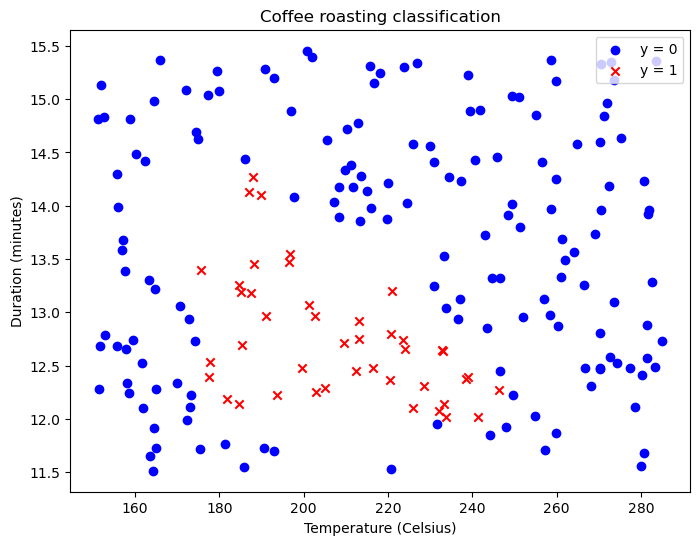

In [30]:
# Plot the data
# Separate points by class
class_0 = X[y == 0]
class_1 = X[y == 1]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', marker='o', label='y = 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', marker='x', label='y = 1')

# Labels and legend
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Duration (minutes)')
plt.title('Coffee roasting classification')
plt.legend(loc='upper right')
plt.show()

## Normalization
As in the lab, we'll use the `Normalization` method in keras to normalize our data.

In [31]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


## Predictions on two examples, evaluate model accuracy

In [32]:
# Copy trained weights and biases from the previous lab
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [33]:
# Make predictions on two examples
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
_, predictions_tst = prediction(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp, sequential)
print(predictions_tst)

[[1]
 [0]]


The model predicts the two examples correctly. Next, we make predictions on all training examples and calculate the accuracy of our prediction.

In [34]:
# Make predictions on all training examples
prob, predictions = prediction(Xn, W1_tmp, b1_tmp, W2_tmp, b2_tmp, sequential)
accuracy = sum(predictions[:, 0] == y) / len(y)
print("Prediction accuracy = {}".format(accuracy))

Prediction accuracy = 1.0


## Predicted probability (original plotting routine)
Finally, we make a prediction for the probability of an example being a good roast and overlay it on the training data. The dark area means a high probabilty of being a good roast. We can see that our model predicts the result very well.

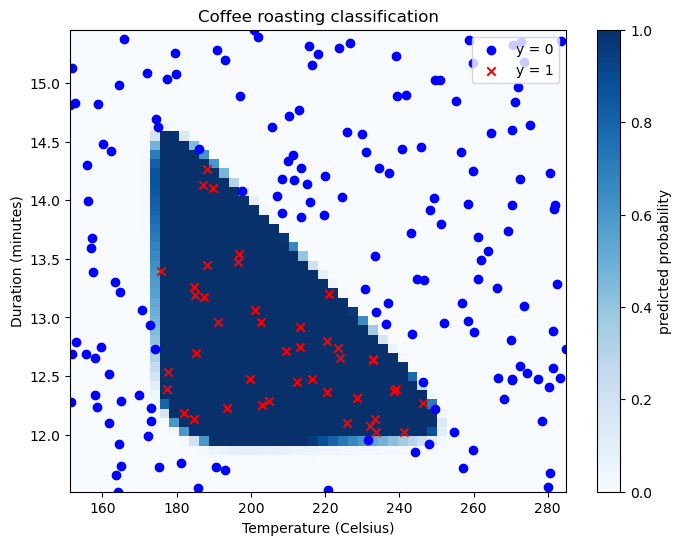

In [35]:
# Plot predicted probabilty over the grid within the range of training examples
X0_grid = np.linspace(max(X[:, 0]), min(X[:, 0]), 100)
X1_grid = np.linspace(max(X[:, 1]), min(X[:, 1]), 100)
mesh0, mesh1 = np.meshgrid(X0_grid, X1_grid)
X_grid = np.column_stack((mesh0.ravel(), mesh1.ravel()))
X_gridn = norm_l(X_grid)
predictions_grid, _ = prediction(X_gridn, W1_tmp, b1_tmp, W2_tmp, b2_tmp, sequential)

# Create a 2D histogram plot
plt.figure(figsize=(8, 6))
plt.hist2d(X_grid[:, 0], X_grid[:, 1], weights=predictions_grid[:, 0], bins=50, cmap=plt.cm.Blues, vmin=0., vmax=1.)

# Add color bar to show the scale of z
plt.colorbar(label='predicted probability')

# Plot training examples
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', marker='o', label='y = 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', marker='x', label='y = 1')

# Labels and legend
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Duration (minutes)')
plt.title('Coffee roasting classification')
plt.legend(loc='upper right')
plt.show()